# Neural Network Library - Project Milestone 1 Demo

CSE473s: Computational Intelligence - Fall 2025

## Overview

This notebook demonstrates a complete neural network library built from scratch using only NumPy.


## Setup and Imports

First, we'll import the necessary libraries and our custom neural network implementation.

In [ ]:
%load_ext autoreload
%autoreload 2
# Import required libraries
import numpy as np
import sys

# Add library to path
sys.path.insert(0, '../')

# Import our neural network library
from lib import Network, Dense, ReLU, Sigmoid, Tanh, Softmax, MSE, SGD, plot_losses, plot_decision_boundary

## Part 1: XOR Problem Setup

We'll start with the classic XOR dataset, which is a simple binary classification problem that requires a non-linear decision boundary. The inputs are bipolar (-1 or 1) and the target outputs follow the XOR logic.

In [3]:
# XOR dataset
X = np.array([
    [-1,-1],
    [-1,1],
    [1,-1],
    [1,1]
], dtype=float)

y = np.array([
    [-1],
    [1],
    [1],
    [-1]
], dtype=float)

### Training the Custom Neural Network

Now we'll build and train our custom neural network. The architecture consists of:
- Input layer: 2 neurons (for 2D inputs)
- Hidden layer: 4 neurons with Tanh activation
- Output layer: 1 neuron with Tanh activation

We'll use Mean Squared Error (MSE) loss and Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.5.

Epoch 0, Loss: 1.000858
Epoch 500, Loss: 0.000977
Epoch 1000, Loss: 0.000425
Epoch 1500, Loss: 0.000269
Epoch 2000, Loss: 0.000196
Epoch 2500, Loss: 0.000154
Epoch 3000, Loss: 0.000126
Epoch 3500, Loss: 0.000107
Epoch 4000, Loss: 0.000093
Epoch 4500, Loss: 0.000082

Network Architecture:
Layer 0: Dense | Weights: (2, 4) | Biases: (1, 4)
Layer 1: Tanh
Layer 2: Dense | Weights: (4, 1) | Biases: (1, 1)
Layer 3: Tanh


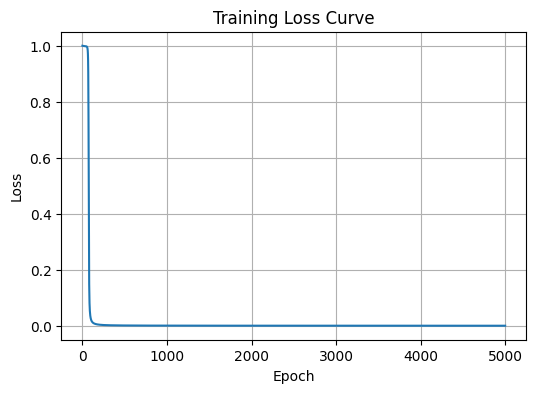


VISUALIZATION: Binary Decision Boundary


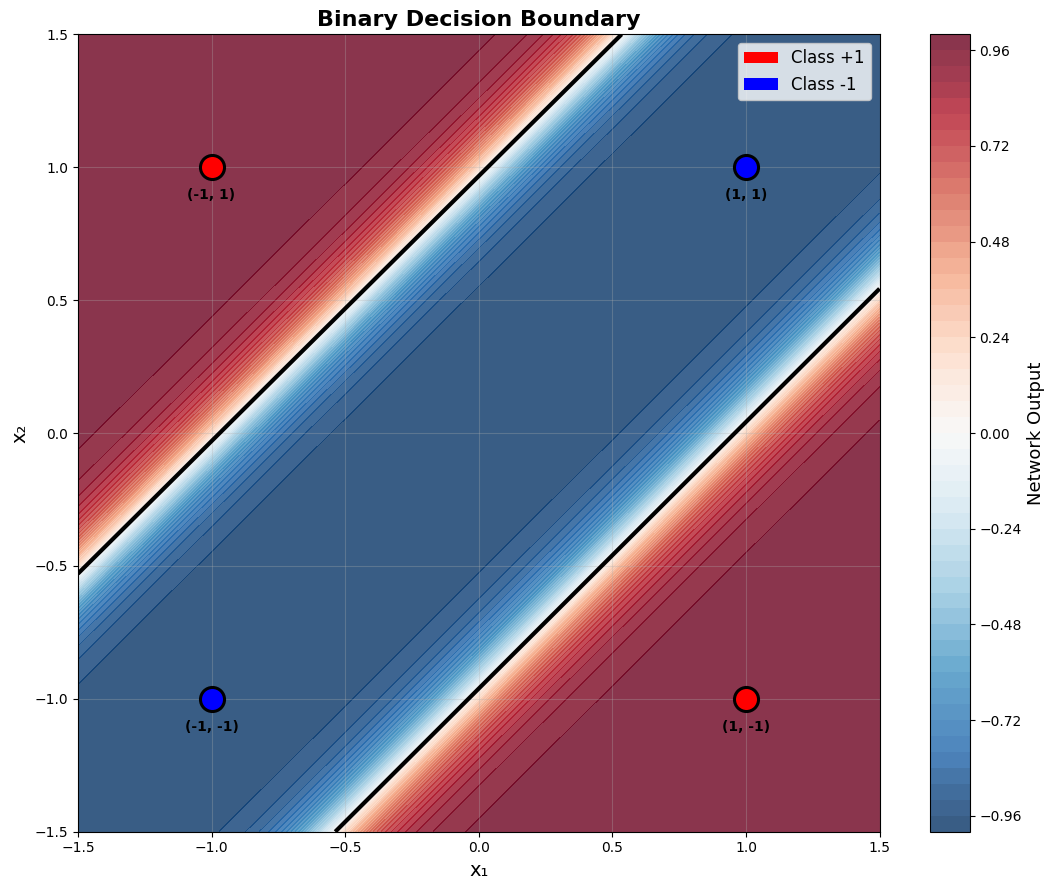

Binary decision boundary visualization complete!


In [4]:
model = Network([
    Dense(2, 4),
    Tanh(),
    Dense(4, 1),
    Tanh()
])

loss_fn = MSE()
optimizer = SGD(learning_rate=0.5)

model.train(X, y, loss_fn, optimizer, epochs=5000, verbose=True)

model.summary()

plot_losses(model.loss_history)
plot_decision_boundary(model, X, y)

## Part 2: Gradient Checking

We implement a gradient checking function to validate that our backpropagation implementation is correct. This uses numerical differentiation (finite differences) to compare against our analytical gradients for all weight and bias parameters in Dense layers.

In [5]:
def gradient_check(model, X, y, loss_fn, epsilon=1e-5, tol=1e-7):
    """
    Performs gradient checking for all Dense layers in the model.
    
    Arguments:
        model    : Network object
        X, y     : Input and target output
        loss_fn  : Loss class (e.g., MSE)
        epsilon  : Small value for numerical gradient
        tol      : Tolerance for max difference
    """
    
    # 1. Forward and backward pass to compute analytical gradients
    y_pred = model.forward(X)
    grad_output = loss_fn.grad(y_pred, y)
    model.backward(grad_output)
    
    for idx, layer in enumerate(model.layers):
        if hasattr(layer, 'W'):
            print(f"\n--- Layer {idx} ---")
            
            # ----- Gradient for weights -----
            num_grad_W = np.zeros_like(layer.W)
            for i in range(layer.W.shape[0]):
                for j in range(layer.W.shape[1]):
                    old_val = layer.W[i,j]
                    
                    layer.W[i,j] = old_val + epsilon
                    loss_plus = loss_fn.loss(model.forward(X), y)
                    
                    layer.W[i,j] = old_val - epsilon
                    loss_minus = loss_fn.loss(model.forward(X), y)
                    
                    num_grad_W[i,j] = (loss_plus - loss_minus) / (2*epsilon)
                    layer.W[i,j] = old_val  # reset
            
            max_diff_W = np.max(np.abs(num_grad_W - layer.dW))
            print(f"Max difference in W: {max_diff_W}")
            
            # ----- Gradient for biases -----
            num_grad_b = np.zeros_like(layer.b)
            for i in range(layer.b.shape[1]):
                old_val = layer.b[0,i]
                
                layer.b[0,i] = old_val + epsilon
                loss_plus = loss_fn.loss(model.forward(X), y)
                
                layer.b[0,i] = old_val - epsilon
                loss_minus = loss_fn.loss(model.forward(X), y)
                
                num_grad_b[0,i] = (loss_plus - loss_minus) / (2*epsilon)
                layer.b[0,i] = old_val  # reset
            
            max_diff_b = np.max(np.abs(num_grad_b - layer.db))
            print(f"Max difference in b: {max_diff_b}")
            
            if max_diff_W < tol and max_diff_b < tol:
                print("Gradients match within tolerance.")
            else:
                print("Warning: Gradients may be incorrect.")

gradient_check(model, X, y, loss_fn)



--- Layer 0 ---
Max difference in W: 6.118583829699265e-14
Max difference in b: 1.985042040681187e-14
Gradients match within tolerance.

--- Layer 2 ---
Max difference in W: 3.742211889760233e-14
Max difference in b: 3.8118379980245365e-15
Gradients match within tolerance.


### Implementing the Gradient Check Function

This function computes numerical gradients using finite differences and compares them with the analytical gradients computed by backpropagation. Large differences would indicate a bug in the backpropagation implementation.

## Part 3: Comparing results with TensorFlow

f:\University\Senior_2\CI\Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

TensorFlow model predictions:
Input: [-1. -1.], Predicted: -0.9913, True: -1.0
Input: [-1.  1.], Predicted: 0.9915, True: 1.0
Input: [ 1. -1.], Predicted: 0.9965, True: 1.0
Input: [1. 1.], Predicted: -0.9925, True: -1.0

Custom model predictions:
Input: [-1. -1.], Predicted: -0.9933, True: -1.0
Input: [-1.  1.], Predicted: 0.9904, True: 1.0
Input: [ 1. -1.], Predicted: 0.9898, True: 1.0
Input: [1. 1.], Predicted: -0.9933, True: -1.0

Max difference between custom model and TensorFlow model predictions: 0.006742481127216204

VISUALIZATION: Binary Decision Boundary
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 737us/step


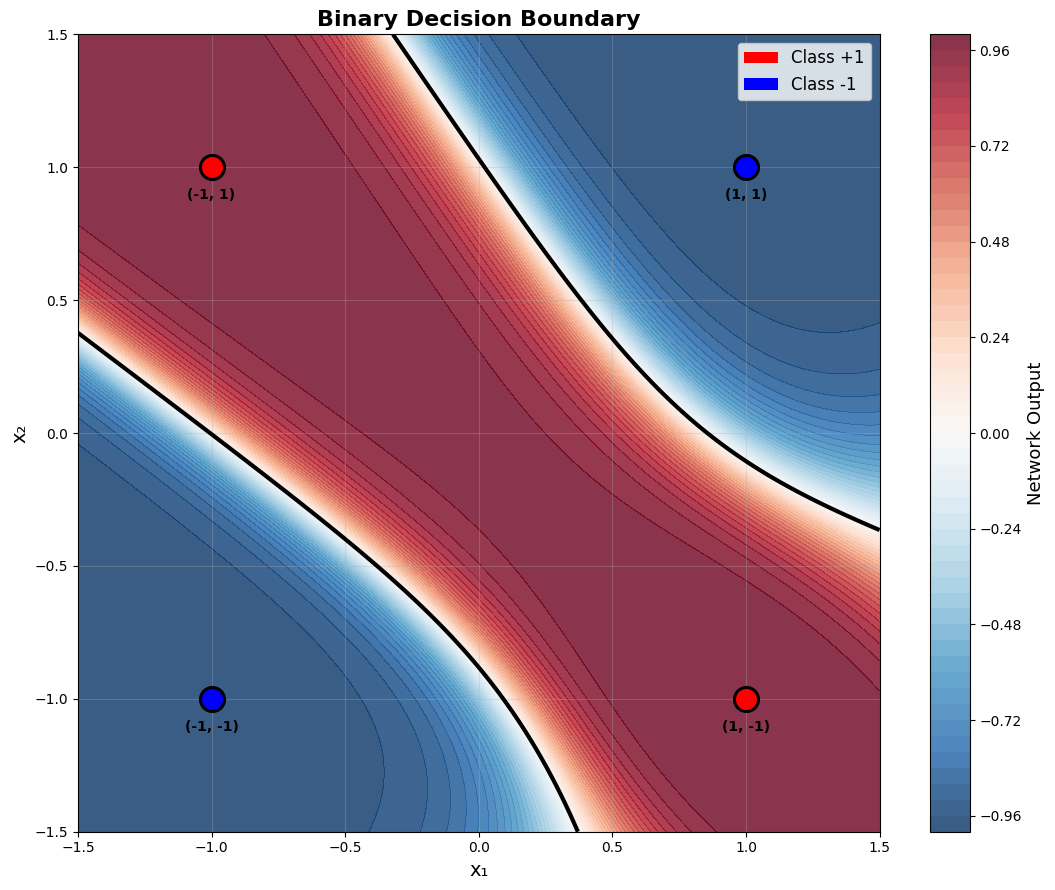

Binary decision boundary visualization complete!


In [5]:
import tensorflow as tf
from tensorflow import keras
# Simple TensorFlow model for XOR
tf_model = keras.Sequential([
    keras.layers.Dense(4, activation='tanh', input_shape=(2,)),
    keras.layers.Dense(1, activation='tanh')
])
tf_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.5), loss='mean_squared_error')
tf_model.fit(X, y, epochs=5000, verbose=0)

y_tf_pred = tf_model.predict(X)

print("\nTensorFlow model predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {y_tf_pred[i][0]:.4f}, True: {y[i][0]}")

# Predictions
y_pred = model.predict(X)
print("\nCustom model predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted: {y_pred[i][0]:.4f}, True: {y[i][0]}")

# Compare predictions
diff = np.abs(y_pred - y_tf_pred)
max_diff = np.max(diff)
print(f"\nMax difference between custom model and TensorFlow model predictions: {max_diff}")

# Decision boundary for TensorFlow model
def tf_predict(X):
    return tf_model.predict(X)
plot_decision_boundary(tf_predict, X, y)



In [ ]:
import time

# --- Custom model timing ---
start = time.time()
model.train(X, y, loss_fn, optimizer, epochs=5000, verbose=False)
custom_time = time.time() - start

# --- TensorFlow timing ---
tf_model = keras.Sequential([
    keras.layers.Dense(4, activation='tanh', input_shape=(2,)),
    keras.layers.Dense(1, activation='tanh')
])
tf_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.5), loss='mean_squared_error')

start = time.time()
tf_model.fit(X, y, epochs=5000, verbose=0)
tf_time = time.time() - start

print(f"Custom Library Training Time: {custom_time:.4f} sec")
print(f"TensorFlow Training Time: {tf_time:.4f} sec")

# Final custom loss
final_custom_loss = loss_fn.loss(model.forward(X), y)
print("Final Custom Model Loss:", final_custom_loss)

# Final TF loss
final_tf_loss = tf_model.evaluate(X, y, verbose=0)
print("Final TensorFlow Loss:", final_tf_loss)


NameError: name 'keras' is not defined

Comparison?